<a href="https://colab.research.google.com/github/kanakhan/GMSW/blob/main/beautifulSoup_news_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 네이버 뉴스 웹 크롤링

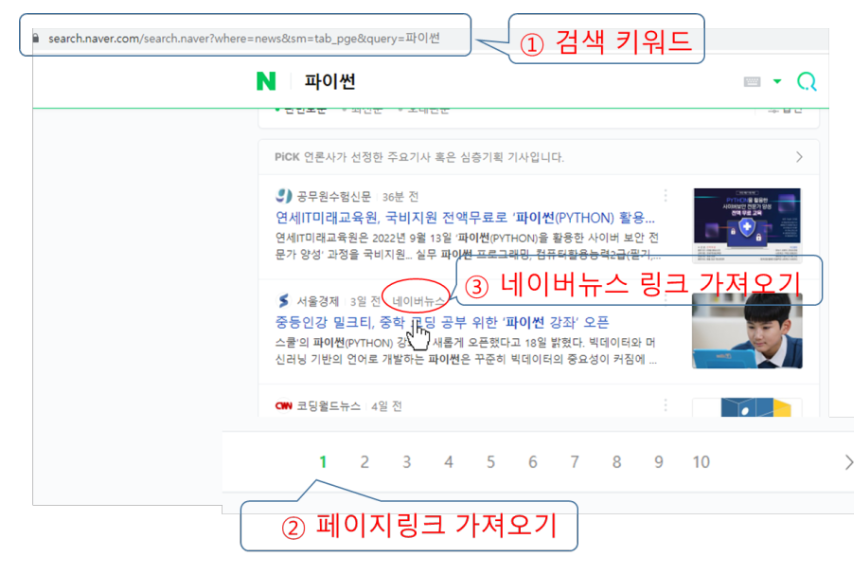

#### 네이버 뉴스 크롤링에 필요한 모듈 호출

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd



#### 크롤링 할 부분을 담고 있는 태그(tag) **선택**

* 검색 키워드 선택 및 파싱

* * User-Agent 확인: http://useragentstring.com/
* * header = {'User-Agent' : ('Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36' '(KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'),}


In [ ]:
header = {'User-Agent' : ('Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36' '(KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'),}


* 모든 페이지 URL 추출

* 페이지에서 '네이버 뉴스' 태그 주소 추출

* '네이버 뉴스' 태크 링크 타고 들어가서 뉴스 기사 내용 추출

* 추출된 텍스트 데이터 프레임으로 전환

##네이버 뉴스 전체 코딩

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def naver_news(page_num):

  header = {'User-Agent' : ('Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36' '(KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'),}
  naver_news_df = pd.DataFrame(columns=('press', 'title', 'time', 'reporter', 'article'))
  idx = 0

  search = input("검색어: ")
  url = "https://search.naver.com/search.naver?where=news&sm=tab_jum&query=" + search

  re_url = requests.get(url)
  soup = BeautifulSoup(re_url.text, 'html.parser')

  pages = soup.find('div', {'class': 'sc_page_inner'}) ##1,2,3페이지 등
  next = []
  for p in pages.find_all('a'):
    next.append("https://search.naver.com/search.naver"+p.get("href"))

  for i in range(0, page_num):
    url = next[i]
    re_url = requests.get(url)
    soup = BeautifulSoup(re_url.text, 'html.parser')
    links = soup.find_all('a',{'class':'info'})
      
    for link in links:
      if (link['href'].find("news.naver") >= 0) : ## 없으면 -1을 가짐
        n_link = link['href']
        r_link = requests.get(n_link,headers = header)
        l_soup = BeautifulSoup(r_link.text, 'html.parser')

        press = l_soup.find('img')
        press = press['title'] ##이미지 태그 안에 신문사의 이름이 들어있음
        title = l_soup.find('h2', {'class':'media_end_head_headline'}).get_text()
        time = l_soup.find('span', {'class':'media_end_head_info_datestamp_time'}).get_text()
        reporter = l_soup.find('em', {'class':'media_end_head_journalist_name'}).get_text()
        article = l_soup.find('div', {'id':'dic_area'}).get_text()

        naver_news_df.loc[idx]=[press, title, time, reporter, article]
        idx += 1
        print("#", end='')

    try:
       next.append("https://search.naver.com/search.naver"+p.get("href"))
    except:
      pass

  return naver_news_df




In [ ]:
naver_news_df = naver_news(3)
naver_news_df

검색어: 월드컵
#########

AttributeError: ignored